<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Общие положения**

Цель проекта - установка параметров для создания автоматизированной системы отслеживания аномалий и мошеннической деятельности на рынке недвижимости.

**Основные шаги:**

1. Открытие файла с данными и изучение общей информации;
2. Предобработка данных, заполнение пропусков, обработка непонятных значений;
3. Расчет необходимых параметров для анализа;
4. Исследовательский анализ данных;
5. Общий вывод.

**Описание полей данных:**
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* балкон — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* этаж — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

## Изучение данных из файла

Открытие файла с данными и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# код для отображения 100 столбцов в датасетах
pd.options.display.max_columns = 100

**Обзор данных**

In [2]:
path_to_file = r'C:\Users\PC\Desktop\Софт\Tasks\real_estate_data.csv'

In [3]:
data = pd.read_csv(path_to_file, sep=',')

In [4]:
# Получение общей информации
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23393 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23393 non-null  int64  
 1   last_price            23393 non-null  float64
 2   total_area            23393 non-null  float64
 3   first_day_exposition  23393 non-null  object 
 4   rooms                 23393 non-null  int64  
 5   ceiling_height        23393 non-null  float64
 6   floors_total          23393 non-null  float64
 7   living_area           23393 non-null  float64
 8   floor                 23393 non-null  int64  
 9   is_apartment          2756 non-null   object 
 10  studio                23393 non-null  bool   
 11  open_plan             23393 non-null  bool   
 12  kitchen_area          23393 non-null  float64
 13  balcony               23393 non-null  int64  
 14  locality_name         23345 non-null  object 
 15  airports_nearest      17

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Из анализа полученных данных можно выделить несколько наблюдений**
* Всего в файле с данными - 23 669 строк.
* Полностью заполнены данными столбцы total_images, last_price, total_area, rooms, floor, studio, open_plan, living_area. Таким образом в данных столбцах отсутствуют пропуски данных.
* В столбцах floors_total и locality_name заполнены данными более 98% строк, т.о. пропуски далее можно будет удалить в связи с малочисленностью.
* В столбце balcony (балконы) пропусков - 11 519, скорее всего это означает что в квартире нет балкона и пропуски можно заменить на 0.
* В столбцах таблицы соблюдается корректность типов данных. 
   * У некоторых числовых полей есть тип данных float (например, ceiling_height) - т.к. в столбцах есть пропуски (NaN) и pandas такие столбцы автоматически назначает float, с ними можно выполнять математические операции, например вычислить среднее значение.
   * В некоторых столбцах тип данных - int64 (например, rooms), который не нужно преобразовывать.

In [7]:
# Также проверим датасет на наличие дубликатов:
print(data.duplicated().sum())
# Дубликатов не обнаружено.

0


## Предобработка данных

**Для предварительной обработки данных определим и изучим пропущенные значения:**

В столбце "balcony" в некоторых строках не указано число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Кроме того, преобразуем столбец к целочисленному типу данных (int).

In [10]:
data['balcony'] = data['balcony'].fillna(0).astype(int)
display(data['balcony'].value_counts())

balcony
0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: count, dtype: int64

Также в столбце "floors_total" из 23 699 строк заполнено 23 613, не заполнено – 86.
Максимальный этаж – 60, кол-во квартир с этажностью более 30 этажей – 32. Удалим 86 строк, в которых не заполнено количество этажей.

In [11]:
# Удалим 86 строк, в которых не заполнено количество этажей.
data = data.dropna(subset=['floors_total'])

В столбце "ceiling_height" из 23 699 строк заполнено 14 504. Кол-во квартир с высотой потолка более 10 м. – 25, это возможные ошибки и ими можно пренебречь из-за незначительности. Также в данных присутствует строка “ nan”, которую надо удалить.

Пропуски в  столбце "ceiling_height" заменим на медианы значений высот потолков по каждому этажу. Для этого напишем цикл перебирающий уникальные значения столбца 'floors_total' и в случае пропуска в столбце 'ceiling_height', заменит на медианное значение высоты потолков по каждому этажу

In [13]:
# display(data['ceiling_height'].unique())
# print(data['ceiling_height'][data['ceiling_height'] > 10].count())

median_replace = data.groupby('floors_total')['ceiling_height'].median()
for total in data['floors_total'].unique():
    data.loc[(data['floors_total'] == total) & (data['ceiling_height'].isna()), 'ceiling_height'] = median_replace[total]

# Далее исключим строки с высотой потолков более 10 м, как вероятные ошибки данных
data.loc[data['ceiling_height'] > 10,'ceiling_height'] = None
data = data.dropna(subset=['ceiling_height'])
print(data['ceiling_height'][data['ceiling_height'] > 10].count())
# data.info()
# display(data['ceiling_height'].unique())

0


Также пропуски в столбце "kitchen_area" заменим на медианы значений площади кухни по каждому значению кол-ва комнат столбца "rooms". Для этого напишем цикл, перебирающий уникальные значения столбца 'rooms' и в случае пропуска в столбце 'kitchen_area', заменит на медианное значение площади кухни по данному количеству комнат.

In [15]:
median_replace_kitchen = data.groupby('rooms')['kitchen_area'].median()
for total in data['rooms'].unique():
    data.loc[(data['rooms'] == total) & (data['kitchen_area'].isna()), 'kitchen_area'] = median_replace_kitchen[total]
# display(data['kitchen_area'].value_counts())

# Исключим 193 строки с записью "  nan", как вероятные ошибки данных.
data.loc[data['kitchen_area'] == '  nan','kitchen_area'] = None
data = data.dropna(subset=['kitchen_area'])
# display(data['kitchen_area'].unique())

Пропуски в  столбце "living_area" заменим на медианы значений жилой площади по каждому значению кол-ва комнат столбца "rooms". Для этого напишем цикл, перебирающий уникальные значения столбца 'rooms' и в случае пропуска в столбце 'living_area', заменит на медианное значение жилой площади по данному количеству комнат

In [17]:
median_replace_rooms = data.groupby('rooms')['living_area'].median()
for total in data['rooms'].unique():
    data.loc[(data['rooms'] == total) & (data['living_area'].isna()), 'living_area'] = median_replace_rooms[total]

Преобразуем столбец 'floors_total' к целочисленному типу данных (int).

In [19]:
# преобразуем столбец к целочисленному типу данных (int).
data['floors_total'] = data['floors_total'].astype(int)
#  display(data['floors_total'].value_counts())

В столбце "is_apartment" в некоторых строках есть пропуски, заменим такие пропуски на False.

In [20]:
data['is_apartment'] = data['is_apartment'].fillna(False)
# display(data['is_apartment'].value_counts())

C:\Users\PC\AppData\Local\Temp\ipykernel_11328\2274977715.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(False)


Исключим пропуски в столбце "locality_name", как вероятные ошибки данных

In [21]:
# исключим пропуски в столбце "locality_name"
data = data.dropna(subset=['locality_name'])

**Подведем итоги предобработки данных:**

  В первоначальном файле было 23 699 строк, в результате обработки и удаления вероятных ошибок данных осталось в датасете 23 345 строк, по которым заполнены все строки во всех значимых столбцах. В процессе обработки данных произведено следующее:
*  В столбце "balcony" пропуски были заменены на 0, также столбец преобразован к целочисленному типу данных.
* Пропуски в  столбце "ceiling_height" заменили на медианы значений высот потолков по каждому этажу.
* Пропуски в  столбце "kitchen_area" заменили на медианы значений площади кухни по каждому значению кол-ва комнат столбца "rooms".
* Пропуски в  столбце "living_area" заменили на медианы значений жилой площади по каждому значению кол-ва комнат столбца "rooms".
* В столбце "is_apartment" пропуски заменили на False.
* Исключили пропуски в столбце "locality_name", как вероятные ошибки.
Значения в остальных столбцах предлагаю не обрабатывать как менее значимые для проведения данного исследования.

## Расчёты и добавление результатов в таблицу

**В данном разделе необходимо посчитать и добавить в таблицу цену квадратного метра;
день недели, месяц и год публикации объявления; этаж квартиры; варианты — первый, последний, другой; соотношение жилой и общей площади, а также отношение площади кухни к общей.**

Посчитаем и добавим в столбец "price_area" цену квадратного метра

In [22]:
data['price_area'] = data['last_price'] / data['total_area']

Добавим в таблицу день недели, месяц и год публикации объявления

In [23]:
# столбец "first_day_exposition" приведем к удобному виду, оставим только год, месяц, день
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [24]:
data['day_weekday'] = data['first_day_exposition'].dt.weekday
data['day_month'] = data['first_day_exposition'].dt.month
data['day_year'] = data['first_day_exposition'].dt.year
# data.head()

Добавим в таблицу варианты этажа квартиры (первый, последний, другой)

In [25]:
data['floor_group'] = 'другой'
data['floor_group'] = data['floor_group'].where(data['floor'] > 1, 'первый')
data['floor_group'] = data['floor_group'].where(data['floor'] < data['floors_total'], 'последний')
# data.head()

Также добавим в таблицу столбец "living_total" соотношение жилой и общей площади

In [26]:
data['living_total'] = data['living_area'] / data['total_area']

Кроме того, добавим в таблицу столбец "kitchen_total" отношение площади кухни к общей

In [27]:
data['kitchen_total'] = data['kitchen_area'] / data['total_area']

**В данном разделе посчитали и добавили в исходную таблицу следующие столбцы:**
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* варианты этажности квартиры — первый, последний, другой;
* соотношение жилой и общей площади;
* отношение площади кухни к общей.

## Исследовательский анализ данных

Для изучения данных о площаде, цене, числу комнат, высоте потолков построим гистограммы для каждого параметра

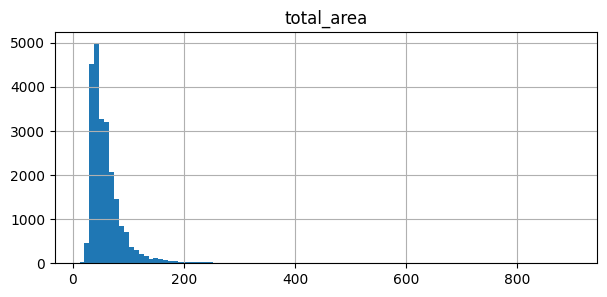

count    23345.000000
mean        60.585056
std         35.626497
min         12.000000
25%         40.200000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64


In [28]:
# Гистограмма для столбца площади квартиры
data.hist('total_area', bins=100, figsize = (7,3))
plt.show()
print(data['total_area'].describe())

Из гистограммы видно, что большим спросом пользуются квартиры до 100 м2, среднее значение площади составляет - 60,5 м2. Квартиры с площадью более 150 м2 являются редкостью.

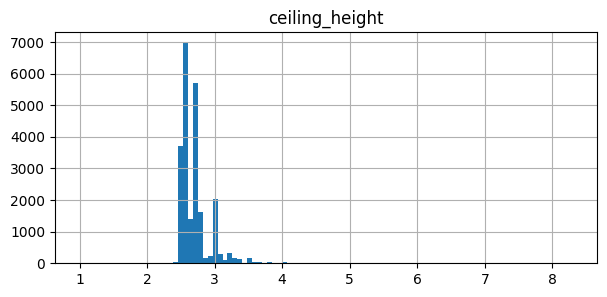

count    23345.000000
mean         2.708036
std          0.245636
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          8.300000
Name: ceiling_height, dtype: float64


In [29]:
# Гистограмма для столбца высота потолка
data.hist('ceiling_height', bins=100, figsize = (7,3))
plt.show()
print(data['ceiling_height'].describe())

Из гистограммы видно, что высота потолков в среднем 2.5 - 2.7 м, средняя высота потолков - 2,7 м. Максимальная высота - 8,3 м.

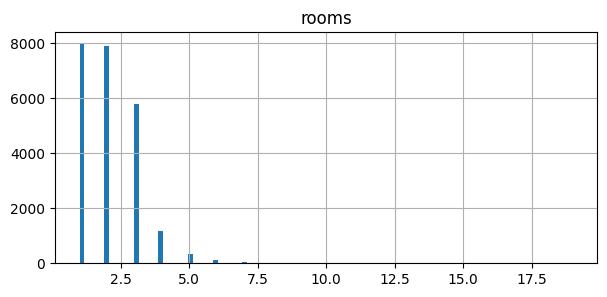

count    23345.000000
mean         2.087942
std          1.066630
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


In [30]:
# Гистограмма для столбца количество комнат
data.hist('rooms', bins=100, figsize = (7,3))
plt.show()
print(data['rooms'].describe())

Из гистограммы видно, что наиболее популярные квартиры 1 и 2 комнатные квартиры, 
немного ниже спрос на 3 комнатные квартиры.

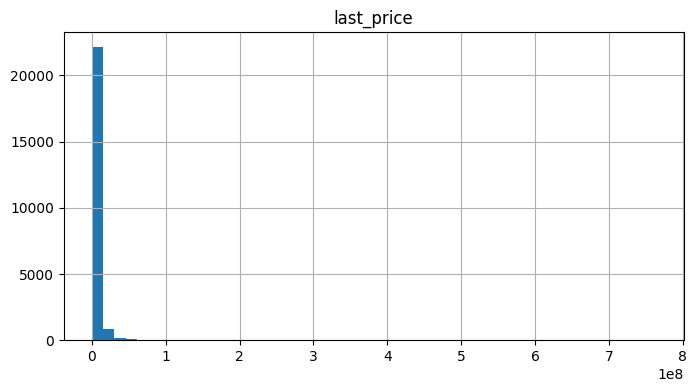

count    2.334500e+04
mean     6.568079e+06
std      1.094804e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


In [32]:
# Гистограмма для столбца цены
data.hist('last_price', bins=50, figsize = (8,4))
plt.show()
print(data['last_price'].describe())

Из гистограммы видно, что большинство квартир стоимостью до 15 млн. рублей, максимальная стоимость квартиры составляет 763 млн. рублей.

Далее изучим время продажи квартиры, посчитаем среднее и медиану

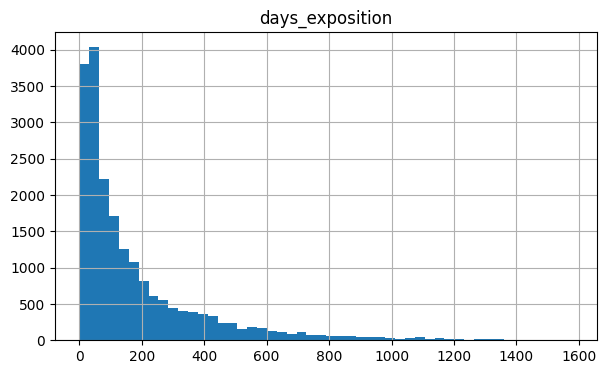

count    20194.000000
mean       181.411261
std        220.148874
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64
96.0


In [34]:
# Гистограмма для столбца "days_exposition"
data.hist('days_exposition', bins=50, figsize = (7,4))
plt.show()
print(data['days_exposition'].describe())
print(data['days_exposition'].median())

Из гистограммы видно, что обычно объявления размещаются на период до 3 месяцев, что можно считать достаточно быстрой продажей, но достаточно много объявлений "висит" более 7-8 месяцев (медленная продажа). Среднее время продажи - 181 день, значение медианы составляет 96 дней.

Из полученных гистограмм также можно наблюдать редкие и выбивающиеся значения, например максимальная стоимость квартиры - 763 млн. рублей, максимальное время продажи квартиры - 1 580 дней (более 4 лет), также максимальная высота потолка составляет 8,3 м, максимальное количество комнат - 19.

In [37]:
# удалим квартиры с высотой потолка менее 2м., их оказалось - 3.
print(data['ceiling_height'][data['ceiling_height'] < 2].count())
data.loc[data['ceiling_height'] < 2,'ceiling_height'] = None
data = data.dropna(subset=['ceiling_height'])
print(data['ceiling_height'][data['ceiling_height'] < 2].count()) # проверка после удаления

3
0


In [38]:
# Также исключим значения с наименьшей ценой квартирыю. Всего одна квартира с ценой менее 100000 рублей, ее цена - 12 190 руб
print(data['last_price'][data['last_price'] < 100000].count())
data.loc[data['last_price'] < 100000,'last_price'] = None
data = data.dropna(subset=['last_price'])
data['last_price'][data['last_price'] < 100000].count() # проверка после удаления

1


np.int64(0)

Рассмотрим, какие факторы больше всего влияют на стоимость квартиры, построим коэффициент корреляции. 

In [ ]:
print(data.corr()[['last_price', 'price_area']])

In [40]:
print(data.corr(numeric_only=True)[['last_price', 'price_area']])

                     last_price  price_area
total_images           0.104730    0.134797
last_price             1.000000    0.739753
total_area             0.653227    0.306569
rooms                  0.364727    0.060355
ceiling_height         0.286427    0.294816
floors_total          -0.004093    0.148790
living_area            0.556302    0.215614
floor                  0.028564    0.129272
is_apartment           0.027465    0.037562
studio                -0.007493    0.000764
open_plan              0.007273    0.008624
kitchen_area           0.454634    0.369743
balcony                0.009905    0.021100
airports_nearest      -0.026933   -0.038255
cityCenters_nearest   -0.206629   -0.317808
parks_around3000       0.151133    0.186418
parks_nearest         -0.016585    0.006520
ponds_around3000       0.161532    0.192084
ponds_nearest         -0.086592   -0.106321
days_exposition        0.080360    0.048283
price_area             0.739753    1.000000
day_weekday            0.001448 

Оценим, зависит ли цена квартиры от площади, числа комнат и удалённости от центра.

<Axes: xlabel='total_area'>

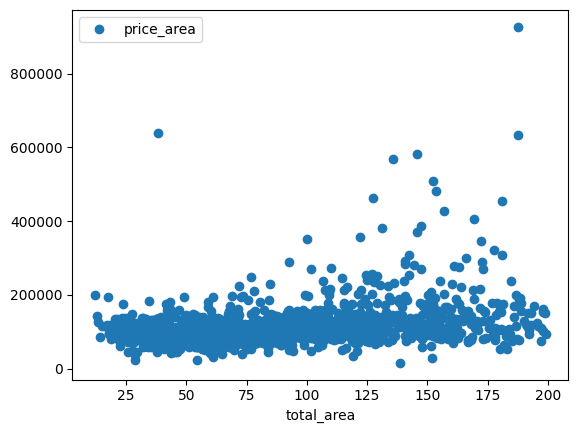

In [35]:
# Оценим зависимость цены м2 от площади квартиры
data.query('total_area<200').pivot_table(index='total_area', values='price_area', aggfunc='median').plot(style='o')

В целом можно выделить незначительное соответствие, чем больше площадь квартиры, тем меньше цена квадратного метра и квартиры в целом.

<Axes: xlabel='rooms'>

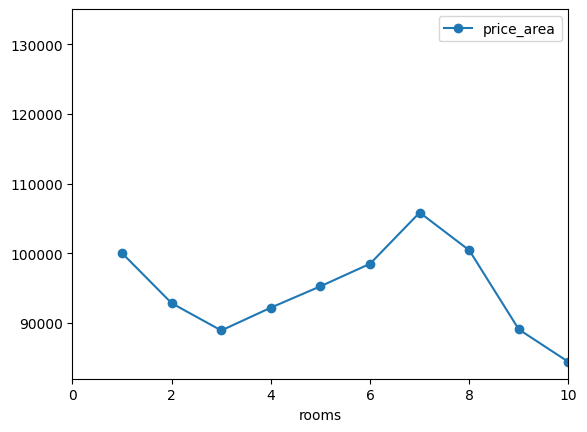

In [36]:
# Оценим зависимость цены м2 от числа комнат
data.query('last_price<80000000').pivot_table(index='rooms', values='price_area', aggfunc='median').plot(style='o-', xlim=(0,10))

Цена за квадратный метр уменьшается при увеличении числа комнат до 3, начиная с 4 комнат, цена м2 увеличивается.

<Axes: xlabel='cityCenters_nearest'>

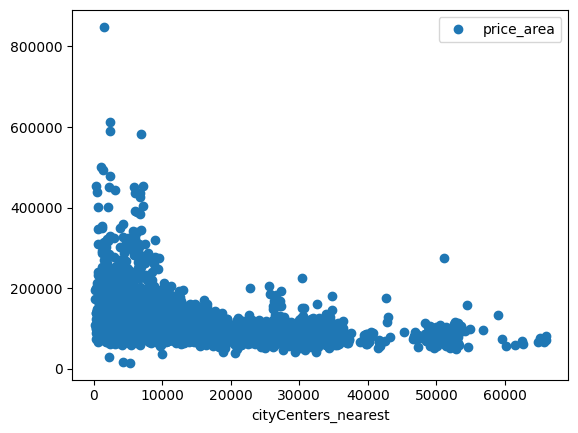

In [41]:
# Оценим зависимость цены м2 от удаленности от центра
data.query('last_price<100000000').pivot_table(index='cityCenters_nearest', values='price_area', aggfunc='median').plot(style='o')

Расстояние до центра напрямую влияет на стоимость квартиры, чем ближе к центру тем дороже. При расстоянии до центра более 30 км., данная зависимость менее выражена.

<Axes: xlabel='floor_group'>

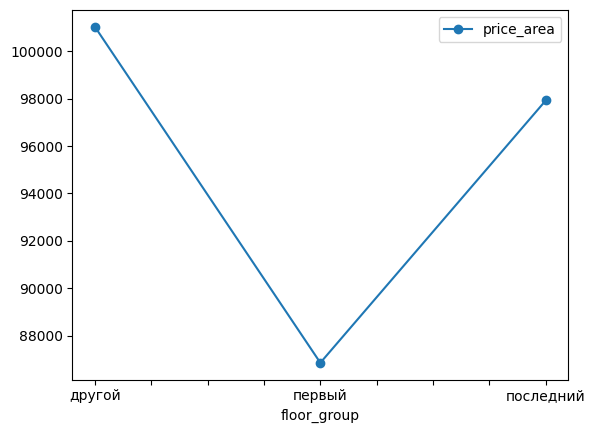

In [42]:
# Оценим зависимость цены м2 от того, на каком этаже расположена квартира
data.query('5<floors_total<25').pivot_table(index='floor_group', values='price_area', aggfunc='median').plot(style='o-')

Квартиры на первом и последнем этаже дешевле чем на других этажах. Также на первом этаже цена существенно ниже чем на последнем.

<Axes: xlabel='day_weekday'>

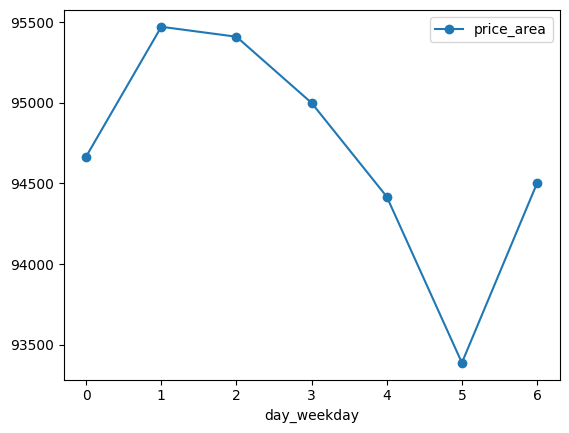

In [43]:
# Оценим зависимость цены м2 от дня размещения объявления
data.query('last_price<100000000').pivot_table(index='day_weekday', values='price_area', aggfunc='median').plot(style='o-')

Наибольшее значение цены м2 у объявлений, выставленных в начале неделе, наименьшая - у объявлений выставленных в конце недели.

<Axes: xlabel='day_month'>

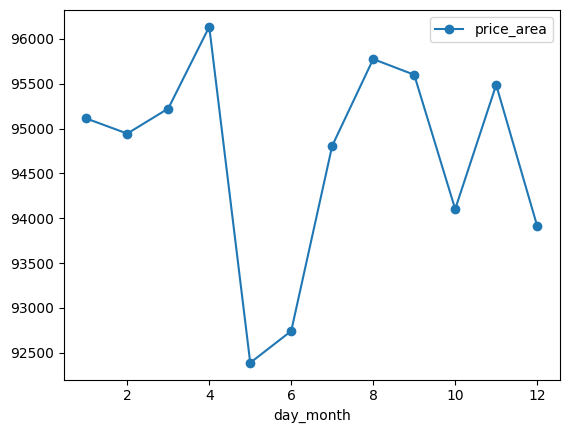

In [44]:
# Оценим зависимость цены м2 от месяца размещения объявления
data.query('last_price<100000000').pivot_table(index='day_month', values='price_area', aggfunc='median').plot(style='o-')

Наибольшее значение цены м2 у объявлений, выставленных в апреле и августе, наименьшая - у объявлений выставленных в мае и июне.

<Axes: xlabel='day_year'>

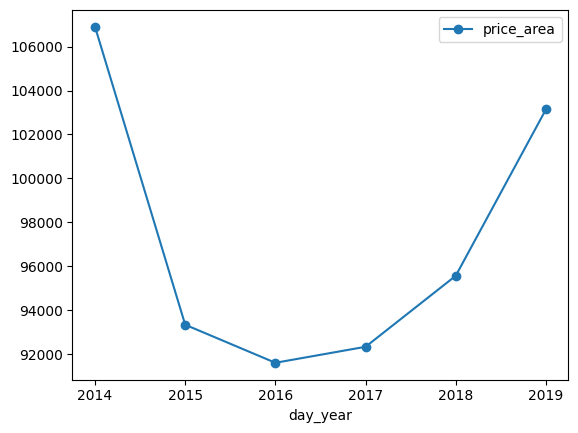

In [45]:
# Оценим зависимость цены м2 от года размещения объявления
data.query('last_price<100000000').pivot_table(index='day_year', values='price_area', aggfunc='median').plot(style='o-')

Наибольшее значение цены м2 у объявлений, выставленных в 2014, затем падает до 2017г, далее растет до 2019г.

In [46]:
# Выберем 10 населённых пунктов с наибольшим числом объявлений
locality=data['locality_name'].value_counts().sort_values(ascending=False).head(10)
display(locality)

locality_name
Санкт-Петербург      15522
посёлок Мурино         493
посёлок Шушары         435
Всеволожск             392
Пушкин                 369
Колпино                338
посёлок Парголово      323
Гатчина                306
деревня Кудрово        283
Выборг                 237
Name: count, dtype: int64

<Axes: xlabel='locality_name'>

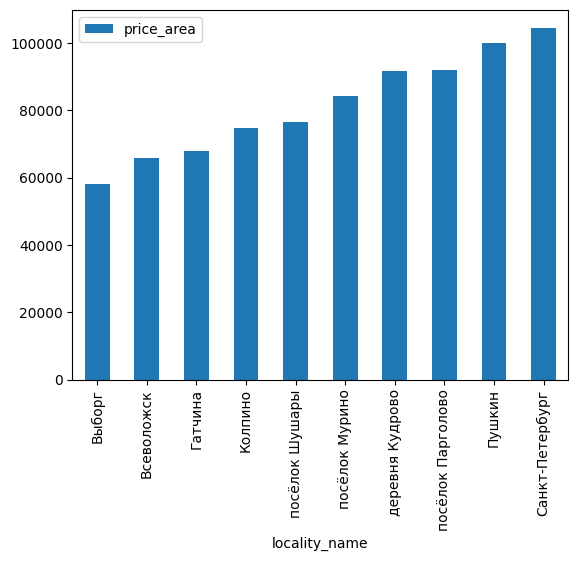

In [47]:
# Посчитаем среднюю цену м2 в этих населённых пунктах, выделим пункты с самой высокой и низкой стоимостью жилья.
data.query('locality_name in @locality.index').pivot_table(index='locality_name', values='price_area', aggfunc='median').sort_values('price_area').plot(kind='bar')

Из графика видно, что населённые пункты с самой высокой стоимостью жилья - это Санкт-Петербург и Пушкин, с самой низкой стоимостью - Выборг и Всеволожск.

Создадим в таблице столбец с расстоянием до центра в километрах, округлим его до целых значений

In [50]:
data['cityCenters'] = (data['cityCenters_nearest']/1000).dropna().astype(int)
# data.head(10)

In [51]:
# посчитаем среднюю цену для каждого километра.
data['price_km'] = data['last_price'] / data['cityCenters'].dropna().astype(int)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_area,day_weekday,day_month,day_year,floor_group,living_total,kitchen_total,cityCenters,price_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481,16.0,8.125000e+05
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277,18.0,1.861111e+05
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214,13.0,3.996923e+05
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,45.00,9,False,False,False,9.50,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,0.283019,0.059748,6.0,1.081667e+07
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000,8.0,1.250000e+06
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой,0.473684,0.299342,NaN,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.66,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,другой,0.284182,0.386059,19.0,1.947368e+05
7,5,7915000.0,71.60,2019-04-18,2,2.75,24,30.50,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой,0.425978,0.263966,11.0,7.195455e+05
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,другой,0.465320,0.265682,NaN,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой,0.714754,0.106557,15.0,3.600000e+05


<Axes: title={'center': 'price_km'}, xlabel='cityCenters'>

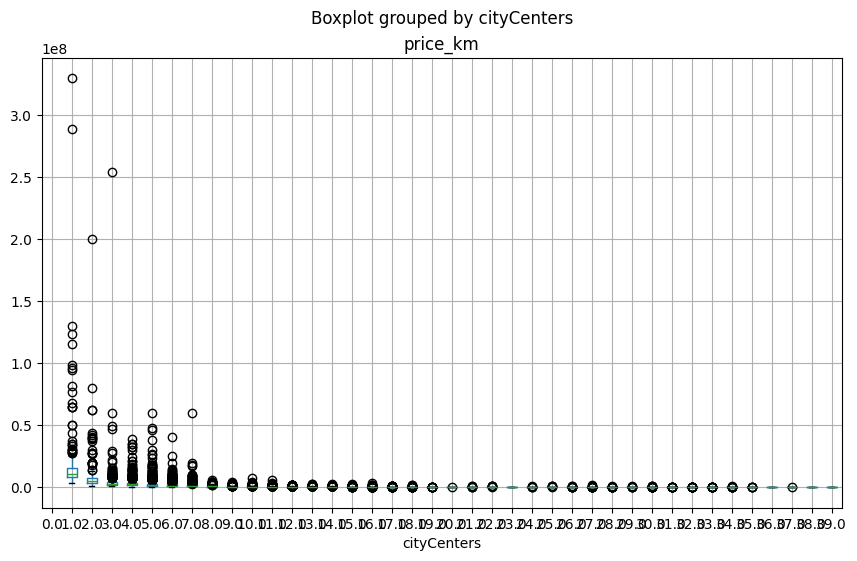

In [52]:
# Построим график зависимости средней цену километра от удалённости от центра
import warnings
warnings.filterwarnings("ignore")
data.query('cityCenters<40').boxplot('price_km', by='cityCenters', figsize=(10,6))

Из графика видно, что максимальная цена квартиры в районе первых 4-5 км от центра, далее снижается до 10 км., после чего цена практически не меняется.

Рассмотрим величины площади, цены, числа комнат и высоты потолков в сегменте квартир расстоянием до центра менее 10 км. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)

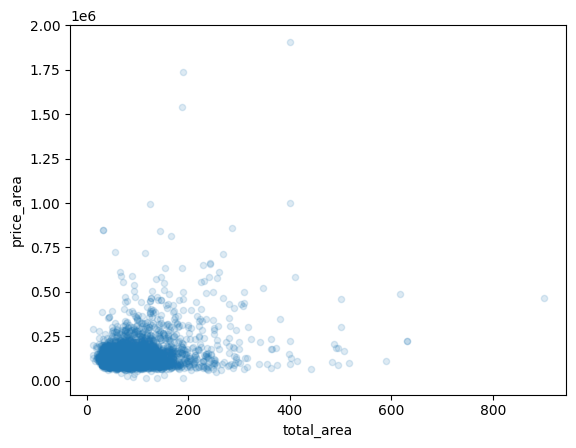

count    23341.000000
mean        60.584865
std         35.627677
min         12.000000
25%         40.200000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64


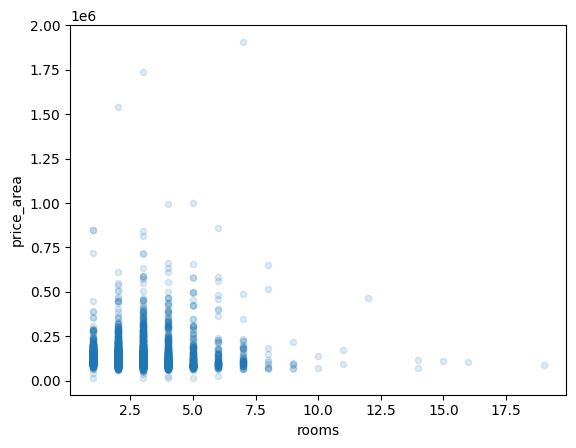

count    23341.000000
mean         2.088000
std          1.066697
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


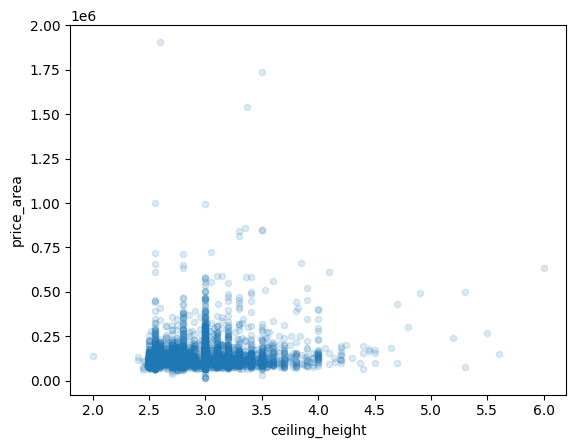

count    23341.000000
mean         2.708213
std          0.245124
min          2.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          8.300000
Name: ceiling_height, dtype: float64


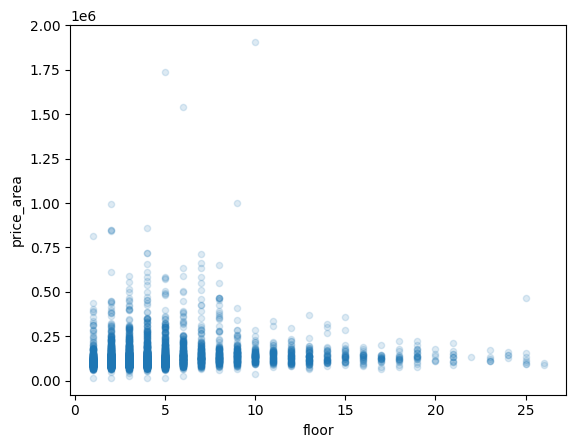

count    23341.000000
mean         5.853862
std          4.845446
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


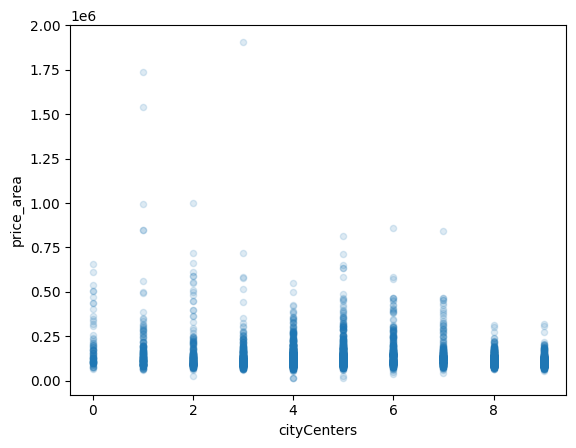

count    17926.000000
mean        13.700770
std          8.633847
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         65.000000
Name: cityCenters, dtype: float64


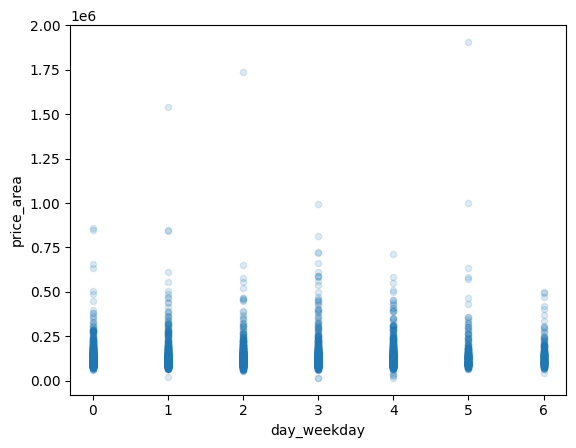

count    23341.000000
mean         2.566514
std          1.789501
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_weekday, dtype: float64


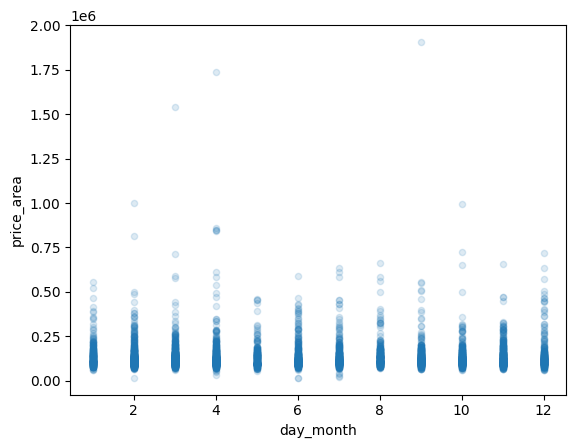

count    23341.000000
mean         6.396555
std          3.492074
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: day_month, dtype: float64


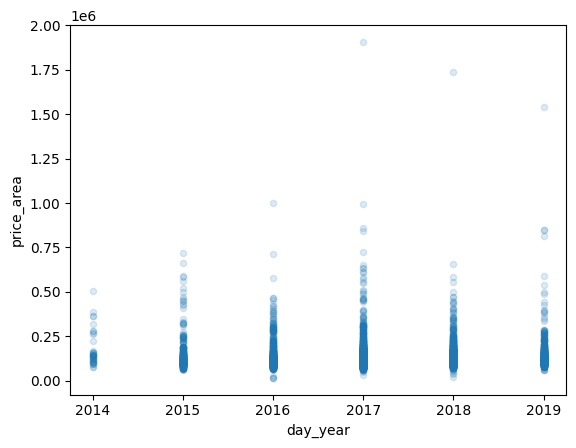

count    23341.000000
mean      2017.369521
std          1.039368
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: day_year, dtype: float64


In [53]:
# Построим графики и вызовем таблицу describe для каждого параметра
for column in ['total_area', 'rooms', 'ceiling_height', 'floor', 'cityCenters', 'day_weekday', 'day_month', 'day_year']:
    data.query('cityCenters<10').plot(x=column, y='price_area', kind='scatter', alpha=0.15)
    plt.show()
    print(data[column].describe())

Выводы по данной категории:
* Подтверждается незначительное соответствие, чем больше площадь квартиры, тем меньше цена квадратного метра и квартиры в целом. Средняя площадь квартиры - 60м2.
* Цена квартир возрастает от 1 до 3 комнат, затем с увеличением кол-ва комнат от 4 - стоимость м2 снижается.
* Высота потолков является одним из основных факторов цены: высота от 2.7 до 3 м сильно влияет на цену, квартиры с высотой менее  2,7м стоят значительно ниже.
* Расстояние до центра напрямую влияет на стоимость квартиры, чем ближе к центру тем дороже. Средняя расстояние до центра - 13,7 км.
* Стоимость м2 постепенно расте до 7-8 этажа, после стоимость м2 снижается. Квартиры на первом и последнем этаже дешевле чем на других этажах. Также на первом этаже цена существенно ниже чем на последнем.
* Наибольшее значение цены м2 у объявлений, выставленных в середине недели, наименьшая - у объявлений выставленных в конце недели.
* Высокие цены у квартир, выставленных в апреле, августе и декабре, наименьшая - в мае
* Средняя цена растет с 2014 до 2017г

## Общий вывод

Проведя исследовательскую работу по объявлениям о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет можно сделать следующие выводы:
* Расстояние до центра напрямую влияет на стоимость квартиры, чем ближе к центру тем дороже. Средняя расстояние до центра - 13,7 км.
* Высота потолков является одним из самых сильным фактором цены: высота от 2.7 до 3.0 прямо влияет на цену кв. метра. При высоте потолков ниже 2.7м цена кв. метра значительно уменьшается. 
* Первые и последние этажи во всех домах в среднем дешевле остальных этажей. Кроме того, цена квартиры на первом этаже существенно ниже чем на последнем.
* При прочих равных цена квартир возрастает от 1 до 3 комнат, затем с увеличением кол-ва комнат от 4 - стоимость кв. метра снижается.
* В целом можно выделить незначительное соответствие, чем больше площадь квартиры, тем меньше цена кв. метра и квартиры в целом. Средняя площадь квартиры - 60м2.
* Стоимость кв. метра постепенно растет до 7-8 этажа, после чего стоимость кв. метра снижается.
* Парки и водоемы поблизости незначительно увеличивают стоимость кв. метра. 
* Самые высокие цены на квартиры, выставленных в апреле и августе, наименьшая - у объявлений выставленных в мае и июне. 
* Наибольшая средняя цена квартир выставленных на продажу в начале недели (понедельник, вторниа), наименьшая - у объявлений выставленных в конце недели (суббота, воскресенье). Средняя цена кв. метра растет до 2014, снижается до 2017г, а затем постепенно увеличивается до 2019г.
* Обычно объявления размещаются на период до 3 месяцев, что можно считать достаточно быстрой продажей, но достаточно много объявлений "висит" более 7-8 месяцев. Среднее время продажи - 181 день.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [х]  файлы изучены (выведены первые строки, метод `info()`)
- [х]  определены пропущенные значения
- [х]  заполнены пропущенные значения
- [х]  есть пояснение, какие пропущенные значения обнаружены
- [х]  изменены типы данных
- [х]  есть пояснение, в каких столбцах изменены типы и почему
- [х]  посчитано и добавлено в таблицу: цена квадратного метра
- [х]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [х]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [х]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод